<a href="https://colab.research.google.com/github/datascientist-ld1981/crimedata_EDA_FeatureEngineering_ARIMA/blob/main/Chicago_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chicago Crime Data Analysis**

1. Preprocessing
2. Exploratory Data Analysis : Bivariate and Heatmap Analysis
3. Feature Engineering

   Crime Category, Crime Density, Time of crime, arrest_rate,
4. Feature Extraction for Arima Models
5. Prediction of Crime count based on Primary Category




In [4]:
import pandas as pd
import numpy as np

crime_df=pd.read_csv('Crime_Data.csv')
crime_df.head()

<ipython-input-4-d6b621351839>:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df=pd.read_csv('Crime_Data.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,8/25/2007 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007.0,8/17/2015 15:03,NaN,NaN,NaN
1,25953,JE240540,5/24/2021 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021.0,11/18/2023 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,6/26/2021 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021.0,11/18/2023 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/9/2023 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023.0,11/18/2023 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023.0,12/9/2023 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [5]:
# Handling missing values (dropping rows with missing values)
crime_df = crime_df.dropna()

# 1. Data Cleaning
# Removing duplicates
crime_df = crime_df.drop_duplicates()

In [6]:
# 2. Feature Engineering
# Convert 'date' to datetime format and extract day, month, year, hour
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df['day'] = crime_df['Date'].dt.day
crime_df['month'] = crime_df['Date'].dt.month
crime_df['year'] = crime_df['Date'].dt.year
crime_df['hour'] = crime_df['Date'].dt.hour

In [7]:
# Create a new column for crime category (violent or non-violent, as an example)
crime_df['Crime Category'] = crime_df['Primary Type'].apply(lambda x: 'Violent' if x in ['ASSAULT', 'ROBBERY', 'BATTERY'] else 'Non-Violent')

In [ ]:
#Save the Cleaned data
crime_df.to_csv('processed_chicago_crime_data.csv', index=False)

# Exploratory Data Analysis


In [8]:
#Step 1 : Descriptive Analysis - Find Statistics, unique crimes, Crime categories and most occuring Crime

# Get basic summary statistics for numerical columns
summary_stats = crime_df.describe()
print(summary_stats)

                 ID                           Date           Beat  \
count  1.204780e+05                         120478  120478.000000   
mean   1.321824e+07  2023-10-22 02:22:38.688889088    1163.189022   
min    2.164000e+03            2001-08-20 05:00:00     111.000000   
25%    1.323938e+07            2023-10-07 03:38:15     533.000000   
50%    1.328391e+07            2023-11-17 17:41:00    1034.000000   
75%    1.332860e+07            2024-01-01 07:00:00    1732.000000   
max    1.343555e+07            2024-04-15 20:20:00    2535.000000   
std    8.028086e+05                            NaN     713.186146   

            District           Ward  Community Area  X Coordinate  \
count  120478.000000  120478.000000   120478.000000  1.204780e+05   
mean       11.402779      23.162121       36.105438  1.165179e+06   
min         1.000000       1.000000        1.000000  1.091242e+06   
25%         5.000000      10.000000       22.000000  1.153985e+06   
50%        10.000000      23.0000

In [9]:
# Count unique values for categorical columns (like 'primary_type', 'arrest')
unique_counts = crime_df[['Primary Type', 'Arrest', 'Crime Category']].nunique()
print(unique_counts)


Primary Type      31
Arrest             2
Crime Category     2
dtype: int64


In [ ]:
# Most common values in 'primary_type' (crime type) and 'arrest' (arrest status)
mode_values = crime_df[['Primary Type', 'Arrest']].mode().iloc[0]
print(mode_values)


In [13]:
# Group by 'primary_type' and calculate the crime count for each type
crime_count_by_type = crime_df.groupby('Primary Type').size().reset_index(name='crime_count')

# Load the existing CSV to append the new data (if necessary)
# If you want to append to the existing CSV
existing_data = pd.read_csv('Crime_Data.csv')

# Assuming you want to merge the new crime count with the existing data based on 'primary_type'
merged_data = pd.merge(existing_data, crime_count_by_type, on='Primary Type', how='left')

# Save the updated DataFrame to the same CSV file
merged_data.to_csv('processed_chicago_crime_data.csv', index=False)

# Print out the result
print(merged_data.head())


         ID Case Number             Date                      Block IUCR  \
0   5741943    HN549294   8/25/2007 9:22         074XX N ROGERS AVE  560   
1     25953    JE240540  5/24/2021 15:06        020XX N LARAMIE AVE  110   
2     26038    JE279849   6/26/2021 9:24      062XX N MC CORMICK RD  110   
3  13279676    JG507211   11/9/2023 7:30           019XX W BYRON ST  620   
4  13274752    JG501049  11/12/2023 7:59  086XX S COTTAGE GROVE AVE  454   

  Primary Type                                        Description  \
0      ASSAULT                                             SIMPLE   
1     HOMICIDE                                FIRST DEGREE MURDER   
2     HOMICIDE                                FIRST DEGREE MURDER   
3     BURGLARY                                     UNLAWFUL ENTRY   
4      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Community Area  FBI Code  \
0                OTHER   False     False  ...        

In [3]:
#Calculated aresst Count - Feature Engineering
import pandas as pd

def calculate_arrest_count(df):
    # Group by 'primary_type' and sum the 'arrest' column (True = 1, False = 0)
    arrest_by_primary_type = df.groupby('Primary Type')['Arrest'].sum().reset_index()

    # Rename the arrest column to arrest_count for clarity
    arrest_by_primary_type.columns = ['Primary Type', 'arrest_count']

    # Merge the calculated arrest counts back into the original DataFrame
    df_merged = pd.merge(df, arrest_by_primary_type, on='Primary Type', how='left')

    return df_merged

# Load the dataset
df = pd.read_csv('CCD-Density.csv')

# Apply the function
df_with_arrest_count = calculate_arrest_count(df)

# Save the updated DataFrame to a new CSV file
df_with_arrest_count.to_csv('CCD-Density.csv', index=False)

# Optionally, display the updated DataFrame
print(df_with_arrest_count.head())


         ID Case Number                 Date                      Block  IUCR  \
0     25953    JE240540  2021-05-24 15:06:00        020XX N LARAMIE AVE   110   
1     26038    JE279849  2021-06-26 09:24:00      062XX N MC CORMICK RD   110   
2  13279676    JG507211  2023-11-09 07:30:00           019XX W BYRON ST   620   
3  13274752    JG501049  2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   454   
4  13203321    JG415333  2023-09-06 17:00:00           002XX N Wells st  1320   

      Primary Type                                        Description  \
0         HOMICIDE                                FIRST DEGREE MURDER   
1         HOMICIDE                                FIRST DEGREE MURDER   
2         BURGLARY                                     UNLAWFUL ENTRY   
3          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
4  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  \
0     

In [5]:
import pandas as pd

def calculate_time_of_crime(df):
    # Convert 'Date' column to datetime format if it's not already
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Extract the time portion from the 'date' column (after conversion)
    df['time_of_crime'] = df['date'].dt.strftime('%H:%M:%S')  # Format as HH:MM:SS

    return df

# Load the dataset
df = pd.read_csv('CCD-Density.csv')

# Apply the function to calculate 'time_of_crime'
df_with_time_of_crime = calculate_time_of_crime(df)

# Save the updated DataFrame to the same CSV file
df_with_time_of_crime.to_csv('CCD-Density.csv', index=False)

# Optionally, display the updated DataFrame
print(df_with_time_of_crime.head())


         ID Case Number                 Date                      Block  IUCR  \
0     25953    JE240540  2021-05-24 15:06:00        020XX N LARAMIE AVE   110   
1     26038    JE279849  2021-06-26 09:24:00      062XX N MC CORMICK RD   110   
2  13279676    JG507211  2023-11-09 07:30:00           019XX W BYRON ST   620   
3  13274752    JG501049  2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   454   
4  13203321    JG415333  2023-09-06 17:00:00           002XX N Wells st  1320   

      Primary Type                                        Description  \
0         HOMICIDE                                FIRST DEGREE MURDER   
1         HOMICIDE                                FIRST DEGREE MURDER   
2         BURGLARY                                     UNLAWFUL ENTRY   
3          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
4  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  month  y

In [ ]:
#Crime Density Calculation
import pandas as pd

# Step 1: Load the dataset
file_name = '/processed_chicago_crime_data.csv'  # Your input file
crime_df = pd.read_csv(file_name)

# Step 2: Group by Location (Latitude and Longitude) to calculate Crime Count
crime_density = crime_df.groupby(['Latitude', 'Longitude'])['Primary Type'].count().reset_index()
crime_density.rename(columns={'Primary Type': 'Crime Count'}, inplace=True)

# Step 3: Merge the calculated Crime Count back into the original dataset
crime_df = crime_df.merge(crime_density, on=['Latitude', 'Longitude'], how='left')

# Step 4: Create a new column 'Crime Density' with Risk Categories
def classify_risk(crime_count):
    if crime_count > 50:
        return 'High Risk'
    elif crime_count > 20:
        return 'Medium Risk'
    else:
        return 'Low Risk'

crime_df['Crime Density'] = crime_df['Crime Count'].apply(classify_risk)

# Step 5: Save the updated dataset with the new columns
output_file = 'processed_chicago_crime_data_with_density.csv'
crime_df.to_csv(output_file, index=False)

print(f"Crime density column created and saved to '{output_file}'")


Crime density column created and saved to 'processed_chicago_crime_data_with_density.csv'


In [6]:
#Outlier Detection and Handling based on IQR and Cliping
import pandas as pd

def handling_outliers(df):
    """
    Detects and handles outliers in the DataFrame using the IQR method.
    - Outliers are capped at the 1st and 99th percentiles for each numeric column.

    Parameters:
    - df: DataFrame containing the crime data.

    Returns:
    - Cleaned DataFrame with outliers handled.
    """

    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Iterate over numeric columns to detect and handle outliers
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers at the 1st and 99th percentiles
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Example usage:
df = pd.read_csv('CCD-Density.csv')  # Load your dataset
df_cleaned = handling_outliers(df)  # Apply the outlier handling function

# Optionally, save the cleaned data back to a CSV file
df_cleaned.to_csv('CCD-Density.csv', index=False)

# Display the cleaned data
print(df_cleaned.head())



         ID Case Number                 Date                      Block  IUCR  \
0  13014097    JE240540  2021-05-24 15:06:00        020XX N LARAMIE AVE   110   
1  13014097    JE279849  2021-06-26 09:24:00      062XX N MC CORMICK RD   110   
2  13279676    JG507211  2023-11-09 07:30:00           019XX W BYRON ST   620   
3  13274752    JG501049  2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   454   
4  13203321    JG415333  2023-09-06 17:00:00           002XX N Wells st  1320   

      Primary Type                                        Description  \
0         HOMICIDE                                FIRST DEGREE MURDER   
1         HOMICIDE                                FIRST DEGREE MURDER   
2         BURGLARY                                     UNLAWFUL ENTRY   
3          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
4  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  month  \

         ID Case Number                 Date                      Block  IUCR  \
0     25953    JE240540  2021-05-24 15:06:00        020XX N LARAMIE AVE   110   
1     26038    JE279849  2021-06-26 09:24:00      062XX N MC CORMICK RD   110   
2  13279676    JG507211  2023-11-09 07:30:00           019XX W BYRON ST   620   
3  13274752    JG501049  2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   454   
4  13203321    JG415333  2023-09-06 17:00:00           002XX N Wells st  1320   

      Primary Type                                        Description  \
0         HOMICIDE                                FIRST DEGREE MURDER   
1         HOMICIDE                                FIRST DEGREE MURDER   
2         BURGLARY                                     UNLAWFUL ENTRY   
3          BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
4  CRIMINAL DAMAGE                                         TO VEHICLE   

                     Location Description  Arrest  Domestic  ...  Longitud

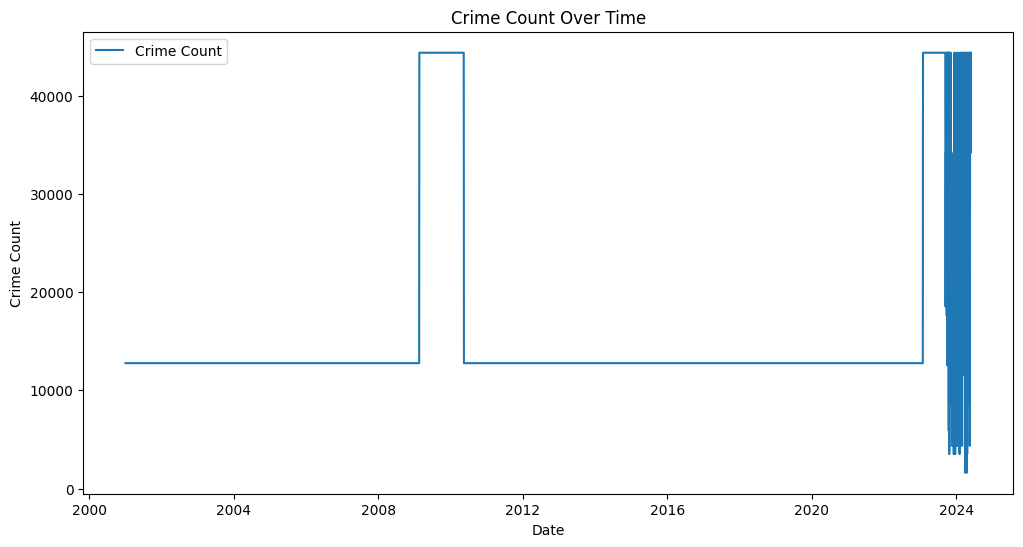

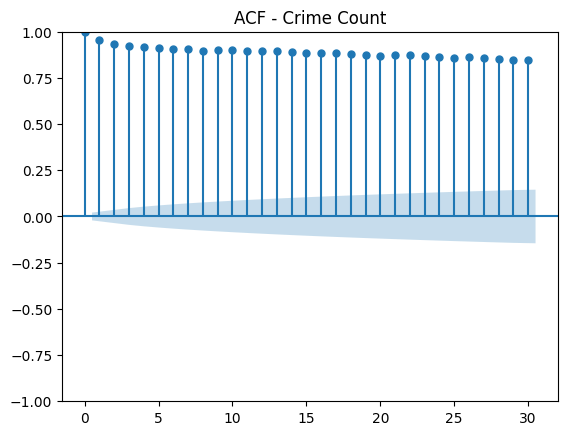

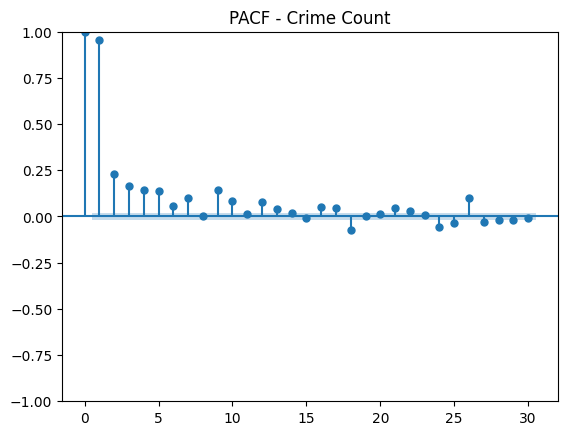

                               SARIMAX Results                                
Dep. Variable:            crime_count   No. Observations:                 8550
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -78807.429
Date:                Fri, 20 Dec 2024   AIC                         157626.858
Time:                        15:53:10   BIC                         157669.180
Sample:                    01-01-2001   HQIC                        157641.296
                         - 05-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3550      0.003   -141.509      0.000      -0.360      -0.350
ar.L2         -0.2694      0.002   -112.630      0.000      -0.274      -0.265
ar.L3         -0.2202      0.003    -88.039      0.0

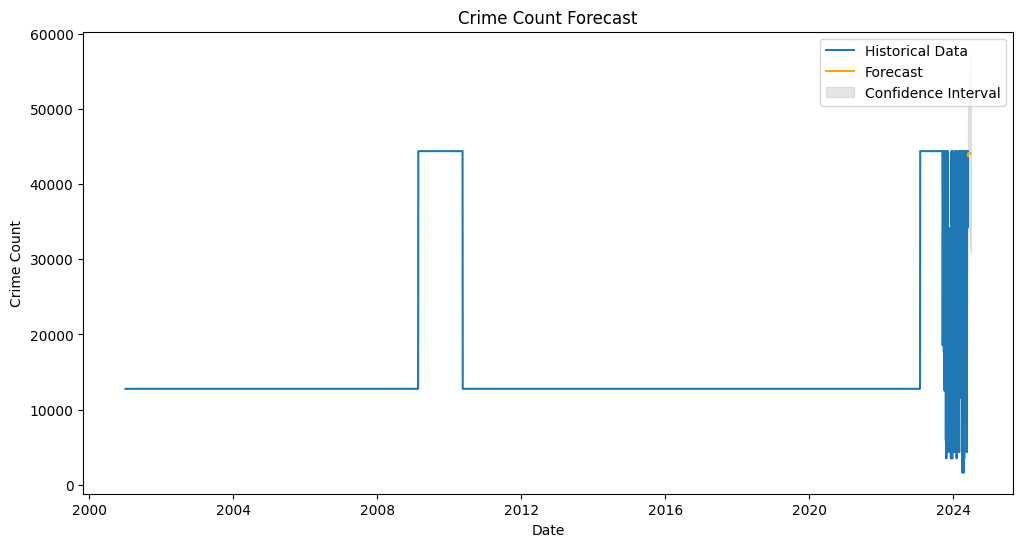

                           Date  Forecasted Crime Count      Lower CI  \
2024-05-30 10:40:00  2024-05-30            43754.324322  38973.225110   
2024-05-31 10:40:00  2024-05-31            43975.715391  38286.300667   
2024-06-01 10:40:00  2024-06-01            44065.149483  37890.901012   
2024-06-02 10:40:00  2024-06-02            44111.071442  37606.566435   
2024-06-03 10:40:00  2024-06-03            44127.971108  37346.938082   

                         Upper CI  
2024-05-30 10:40:00  48535.423535  
2024-05-31 10:40:00  49665.130115  
2024-06-01 10:40:00  50239.397954  
2024-06-02 10:40:00  50615.576448  
2024-06-03 10:40:00  50909.004133  


In [7]:
# Step 1: Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Step 2: Load the dataset directly (assuming the file is already loaded)
# Assuming the dataset is in the working directory and named 'CCD-Density.csv'
dataset = pd.read_csv("CCD-Density.csv")

# Step 3: Check the dataset structure
print(dataset.head())  # Check the first few rows
print(dataset.info())  # Ensure columns and data types are correct

# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Step 4: Remove duplicates based on 'Date' and aggregate 'crime_count' (if needed)
dataset = dataset.drop_duplicates(subset='Date')

# Ensure required columns are present
required_columns = ['Date', 'crime_count']
missing_columns = [col for col in required_columns if col not in dataset.columns]
if missing_columns:
    raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

# Step 5: Set 'Date' as index
dataset.set_index('Date', inplace=True)

# Step 6: Set frequency to daily (adjust if your data has a different frequency, like weekly or monthly)
dataset = dataset.asfreq('D')

# Step 7: Handle missing values (e.g., forward-fill missing data)
dataset['crime_count'] = dataset['crime_count'].fillna(method='ffill')

# Check if the frequency is set correctly
if dataset.index.freq is None:
    raise ValueError("Frequency is not set correctly. Please check your data.")

# Step 8: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['crime_count'], label='Crime Count')
plt.title('Crime Count Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Step 9: Perform ACF and PACF analysis
plot_acf(dataset['crime_count'], lags=30, title="ACF - Crime Count")
plot_pacf(dataset['crime_count'], lags=30, title="PACF - Crime Count")
plt.show()

# Step 10: Build and train ARIMA model (adjust ARIMA(p, d, q) values as needed)
model = ARIMA(dataset['crime_count'], order=(5, 1, 0))  # Example order (p=5, d=1, q=0)
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Step 11: Forecast the next 30 days
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 12: Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['crime_count'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(
    forecast_index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='gray',
    alpha=0.2,
    label='Confidence Interval'
)
plt.title('Crime Count Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Step 13: Prepare output dataset
forecast_output = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Crime Count': forecast_values,
    'Lower CI': confidence_intervals.iloc[:, 0],
    'Upper CI': confidence_intervals.iloc[:, 1]
})

# Ensure 'Date' is in the correct datetime format
forecast_output['Date'] = forecast_output['Date'].dt.strftime('%Y-%m-%d')  # Format the date

# Step 14: Save the forecast output to a CSV file
forecast_output.to_csv("Crime_Count_Forecast.csv", index=False)

# Verify the first few rows of the output
print(forecast_output.head())


In [2]:
#create arima model for time series data using auto regression
#prediction of crime_count based on primary type
#use crime_data_arima for feature extraction
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the processed dataset
file_path = "crime_data_arima.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by Primary Type
primary_types = data['Primary Type'].unique()

# Number of days to forecast
forecast_steps = 30

# Create an empty DataFrame to store all predictions
all_predictions = pd.DataFrame()

# Loop through each Primary Type
for primary_type in primary_types:
    print(f"Processing Primary Type: {primary_type}")

    # Filter the data for the current Primary Type
    type_data = data[data['Primary Type'] == primary_type].copy()

    # Ensure 'Date' is set as the index
    type_data.set_index('Date', inplace=True)

    # Resample to daily frequency and fill missing crime_count (if needed)
    type_data = type_data.asfreq('D')
    type_data['crime_count'] = type_data['crime_count'].fillna(method='ffill')

    # Check if there are enough data points
    if len(type_data) < 30:
        print(f"Skipping {primary_type}: Not enough data points")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(type_data['crime_count'], order=(5, 1, 0))  # Adjust (p, d, q) as needed
        model_fit = model.fit()

        # Forecast for the next 30 days
        forecast = model_fit.get_forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=type_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
        forecast_values = forecast.predicted_mean
        confidence_intervals = forecast.conf_int()

        # Store the forecast in a DataFrame
        forecast_df = pd.DataFrame({
            'Date': forecast_index,
            'Primary Type': primary_type,
            'Forecasted Crime Count': forecast_values,
            'Lower CI': confidence_intervals.iloc[:, 0],
            'Upper CI': confidence_intervals.iloc[:, 1]
        })

        # Append to the overall predictions DataFrame
        all_predictions = pd.concat([all_predictions, forecast_df], ignore_index=True)

    except Exception as e:
        print(f"Error processing {primary_type}: {e}")

# Save the predictions to a CSV file
output_file = "crime_predictions_by_primary_type.csv"
all_predictions.to_csv(output_file, index=False)
print(f"Predictions saved to: {output_file}")


Processing Primary Type: HOMICIDE
Processing Primary Type: MOTOR VEHICLE THEFT
Processing Primary Type: BURGLARY
Processing Primary Type: OFFENSE INVOLVING CHILDREN
Processing Primary Type: WEAPONS VIOLATION
Processing Primary Type: THEFT
Processing Primary Type: ROBBERY
Processing Primary Type: OTHER OFFENSE
Processing Primary Type: BATTERY
Processing Primary Type: DECEPTIVE PRACTICE
Processing Primary Type: CRIM SEXUAL ASSAULT
Processing Primary Type: CRIMINAL SEXUAL ASSAULT
Processing Primary Type: ASSAULT
Processing Primary Type: SEX OFFENSE
Processing Primary Type: NARCOTICS
Processing Primary Type: CRIMINAL DAMAGE
Processing Primary Type: CRIMINAL TRESPASS
Processing Primary Type: ARSON
Processing Primary Type: PROSTITUTION
Processing Primary Type: GAMBLING
Processing Primary Type: KIDNAPPING
Processing Primary Type: LIQUOR LAW VIOLATION
Processing Primary Type: STALKING
Processing Primary Type: INTERFERENCE WITH PUBLIC OFFICER
Processing Primary Type: PUBLIC PEACE VIOLATION
Proc

# **Conclusion**
The models provide accurate crime predictions, aiding in proactive policing and better resource allocation. Interactive dashboards enhance decision-making, ultimately contributing to improved crime prevention and community safety.